In [38]:
# 데이터 불러오기
import seaborn as sns # seaborn을 불러오고 SNS로 축약

# iris라는 변수명으로 Itis data를 download
iris = sns.load_dataset('iris')

# 'species'열을 drop하고 input X를 정의
X = iris.drop('species', axis = 1)
y = iris['species']

In [39]:
# y data를 범주형으로 변환
# LabelEncoder() method를 불러옴
from sklearn.preprocessing import LabelEncoder

classle = LabelEncoder()
# species 열의 문자열을 categorical 값으로 전환
y = classle.fit_transform(iris['species'].values)

In [40]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [41]:
# 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
# Clasification Tree
from sklearn import tree # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=1)
result = dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9523809523809523
0.9777777777777777


[Text(0.3333333333333333, 0.875, 'X[3] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.625, 'X[2] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.6666666666666666, 0.375, 'X[3] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

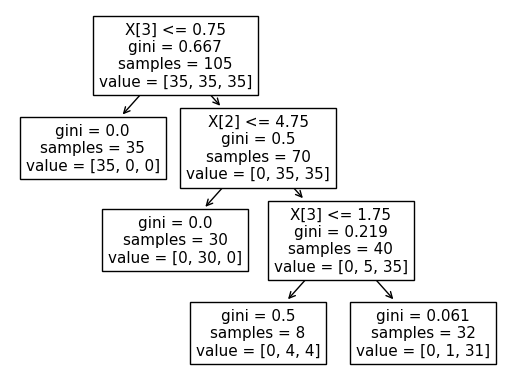

In [43]:
tree.plot_tree(result)

[Text(0.3333333333333333, 0.875, 'petal width <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = Setosa'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.625, 'petal length <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = Versicolor'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Versicolor'),
 Text(0.6666666666666666, 0.375, 'petal width <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]\nclass = Virginica'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = Versicolor'),
 Text(0.8333333333333334, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]\nclass = Virginica')]

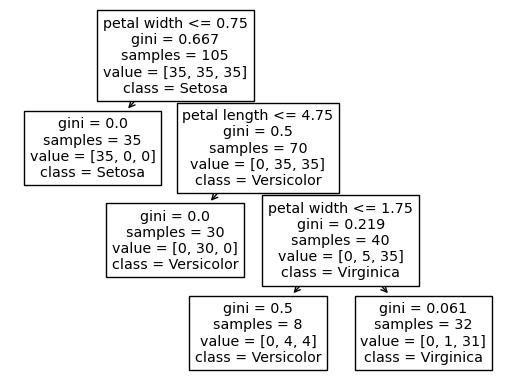

In [44]:
tree.plot_tree(result,
    class_names=['Setosa','Versicolor','Virginica'],
    feature_names=['sepal length', 'sepal width',
                   'petal length', 'petal width'])

In [45]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [46]:
import pandas as pd

wine = pd.read_csv('wine.csv')

In [47]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [48]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [49]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [50]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [51]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [52]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [53]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

KeyboardInterrupt: 

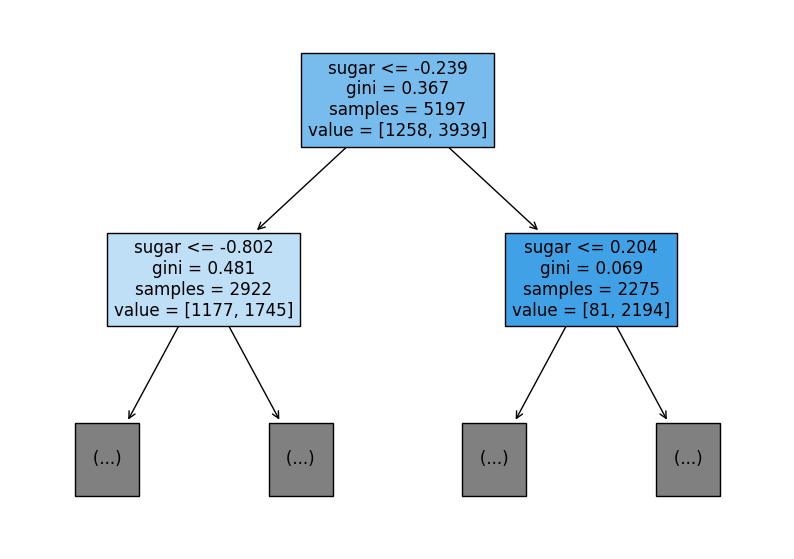

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True,
          feature_names=['alcohol', 'sugar', 'pH'])
plt.show()


In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


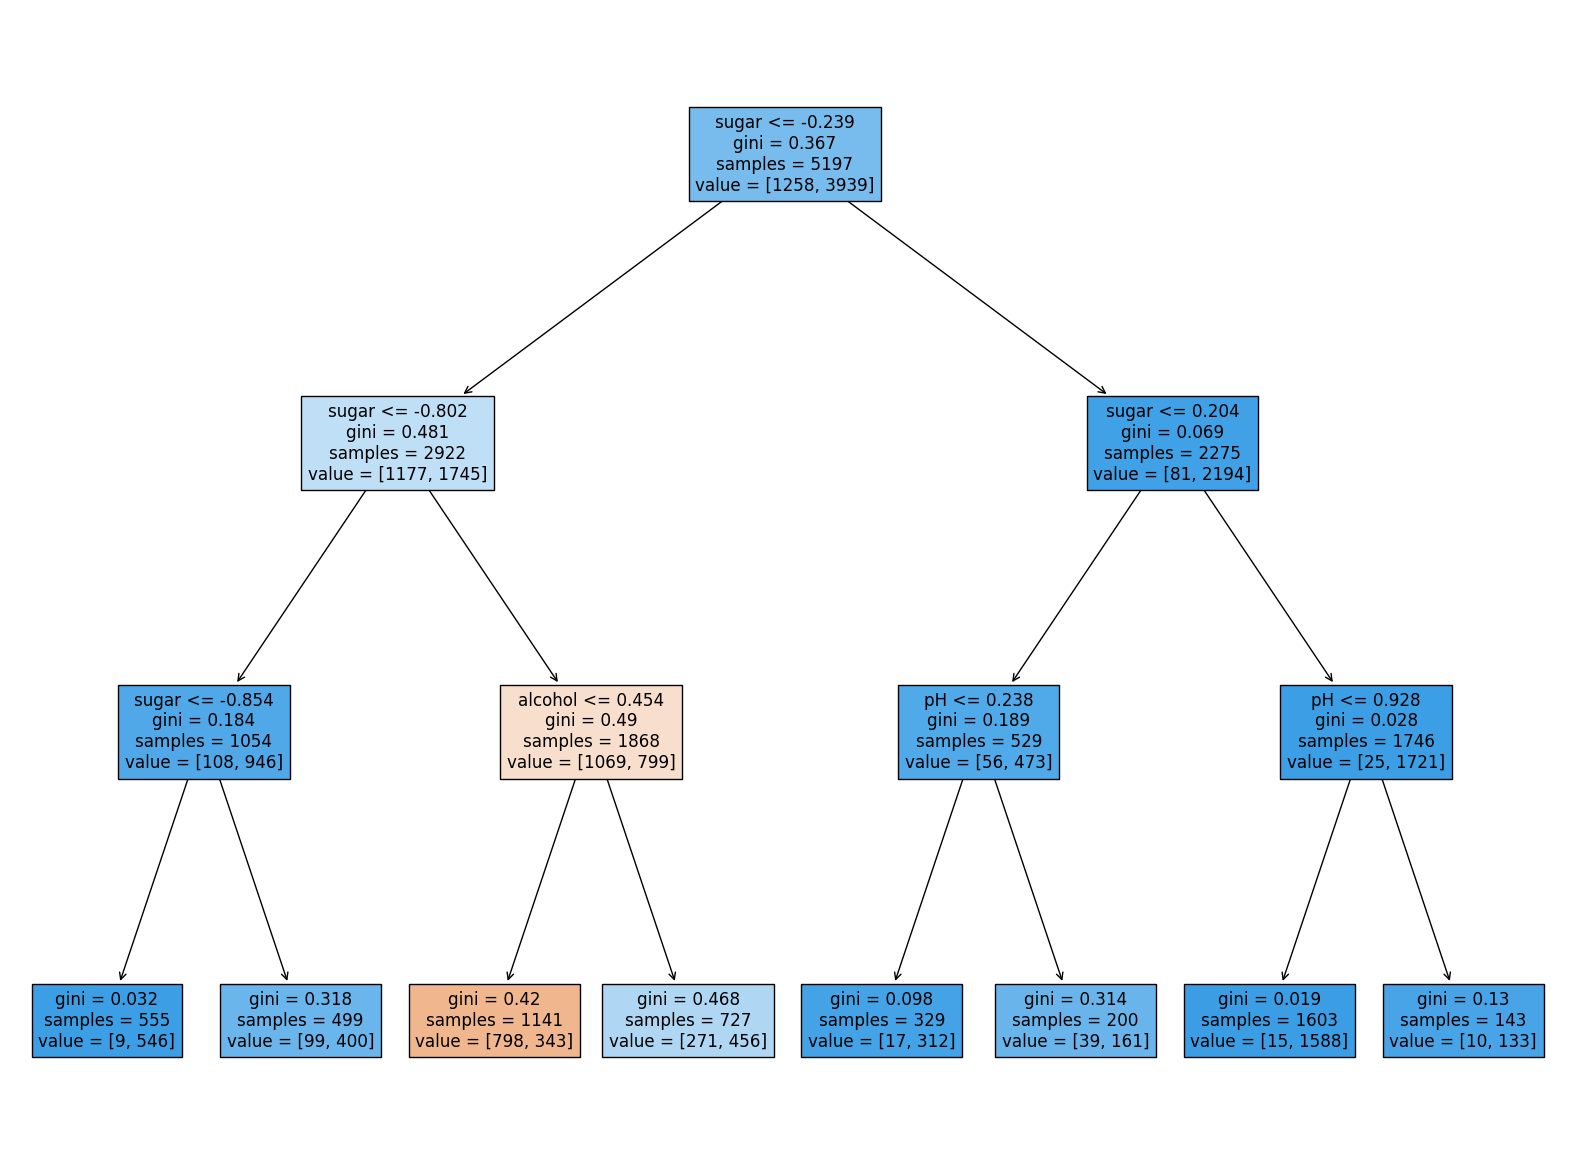

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [123]:
# 문제1. 분꽃 분류 정확도 향상시키고 confusion 행렬
from sklearn import tree # 또는 from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=8, max_leaf_nodes=10, random_state=1)
result = dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
# Accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9904761904761905
0.9777777777777777


[Text(0.5555555555555556, 0.9444444444444444, 'X[3] <= 0.75\nentropy = 1.585\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.4444444444444444, 0.8333333333333334, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6666666666666666, 0.8333333333333334, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.5555555555555556, 0.7222222222222222, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.7777777777777778, 0.7222222222222222, 'X[2] <= 5.15\nentropy = 0.544\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.6666666666666666, 0.6111111111111112, 'X[3] <= 1.85\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(0.5555555555555556, 0.5, 'X[0] <= 6.5\nentropy = 1.0\nsamples = 10\nvalue = [0, 5, 5]'),
 Text(0.4444444444444444, 0.3888888888888889, 'X[1] <= 3.1\nentropy = 0.954\nsamples = 8\nvalue = [0, 3, 5]'),
 Text(0.3333333333333333, 0.2777777777777778, 'X[1] <= 2.75\nentropy = 0.863\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(0.2222222222222222, 0.

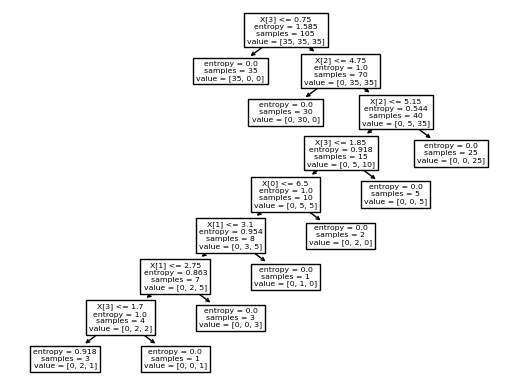

In [124]:
tree.plot_tree(result)

[Text(0.5555555555555556, 0.9444444444444444, 'petal width <= 0.75\nentropy = 1.585\nsamples = 105\nvalue = [35, 35, 35]\nclass = Setosa'),
 Text(0.4444444444444444, 0.8333333333333334, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Setosa'),
 Text(0.6666666666666666, 0.8333333333333334, 'petal length <= 4.75\nentropy = 1.0\nsamples = 70\nvalue = [0, 35, 35]\nclass =  Versicolor'),
 Text(0.5555555555555556, 0.7222222222222222, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass =  Versicolor'),
 Text(0.7777777777777778, 0.7222222222222222, 'petal length <= 5.15\nentropy = 0.544\nsamples = 40\nvalue = [0, 5, 35]\nclass = Virginica'),
 Text(0.6666666666666666, 0.6111111111111112, 'petal width <= 1.85\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]\nclass = Virginica'),
 Text(0.5555555555555556, 0.5, 'sepal length <= 6.5\nentropy = 1.0\nsamples = 10\nvalue = [0, 5, 5]\nclass =  Versicolor'),
 Text(0.4444444444444444, 0.3888888888888889, 'sepal width <= 3.1\nentropy = 0.9

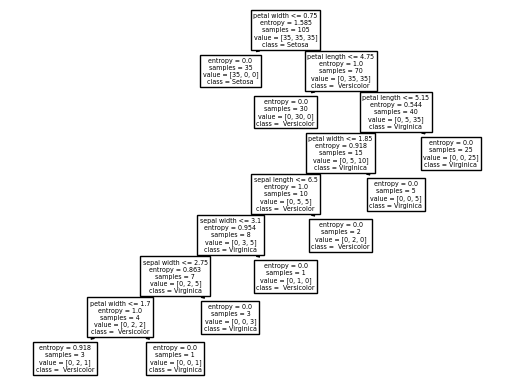

In [125]:
tree.plot_tree(result,
    class_names=['Setosa',' Versicolor', 'Virginica'],
    feature_names=['sepal length', 'sepal width',
                   'petal length', 'petal width'])

In [126]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
